In [1]:
%load_ext autoreload
%autoreload 2

In [ ]:
import os
import sys
sys.path.append(os.path.expanduser('~/rds/rds-dsk-lab-eWkDxBhxBrQ/dimorl/code/mopo'))

In [ ]:
from itertools import zip_longest

import numpy as np
import matplotlib.pyplot as plt

from dogo.results import get_results
from dogo.plot_results import plot_grouped_evaluation_returns

In [3]:
lss = ['-', '--']
cols = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
plt.rc('font', size=12)

In [4]:
#########################
# Dynamics - 0.1M Records
#########################

# 0.1M Records
MP674 = get_results("MP674")
MP675 = get_results("MP675")
MP676 = get_results("MP676")

# 0.25M Records
MP551 = get_results("MP551")
MP552 = get_results("MP552")
MP553 = get_results("MP553")

# 0.5M Records
MP554 = get_results("MP554")
MP555 = get_results("MP555")
MP556 = get_results("MP556")

# 1M Records
MP557 = get_results("MP557")
MP558 = get_results("MP558")
MP559 = get_results("MP559")

# 2M Records
MP560 = get_results("MP560")
MP561 = get_results("MP561")
MP562 = get_results("MP562")

# 3M Records
MP563 = get_results("MP563")
MP564 = get_results("MP564")
MP565 = get_results("MP565")

In [5]:
#######################
# Dynamics - 1M Records
#######################

# 0.1M Records
MP683 = get_results("MP683")
MP684 = get_results("MP684")
MP685 = get_results("MP685")

# 0.25M Records
MP581 = get_results("MP581")
MP582 = get_results("MP582")
MP583 = get_results("MP583")

# 0.5M Records
MP584 = get_results("MP584")
MP585 = get_results("MP585")
MP586 = get_results("MP586")

# 1M Records
MP587 = get_results("MP587")
MP588 = get_results("MP588")
MP589 = get_results("MP589")

# 2M Records
MP590 = get_results("MP590")
MP591 = get_results("MP591")
MP592 = get_results("MP592")

# 3M Records
MP593 = get_results("MP593")
MP594 = get_results("MP594")
MP595 = get_results("MP595")

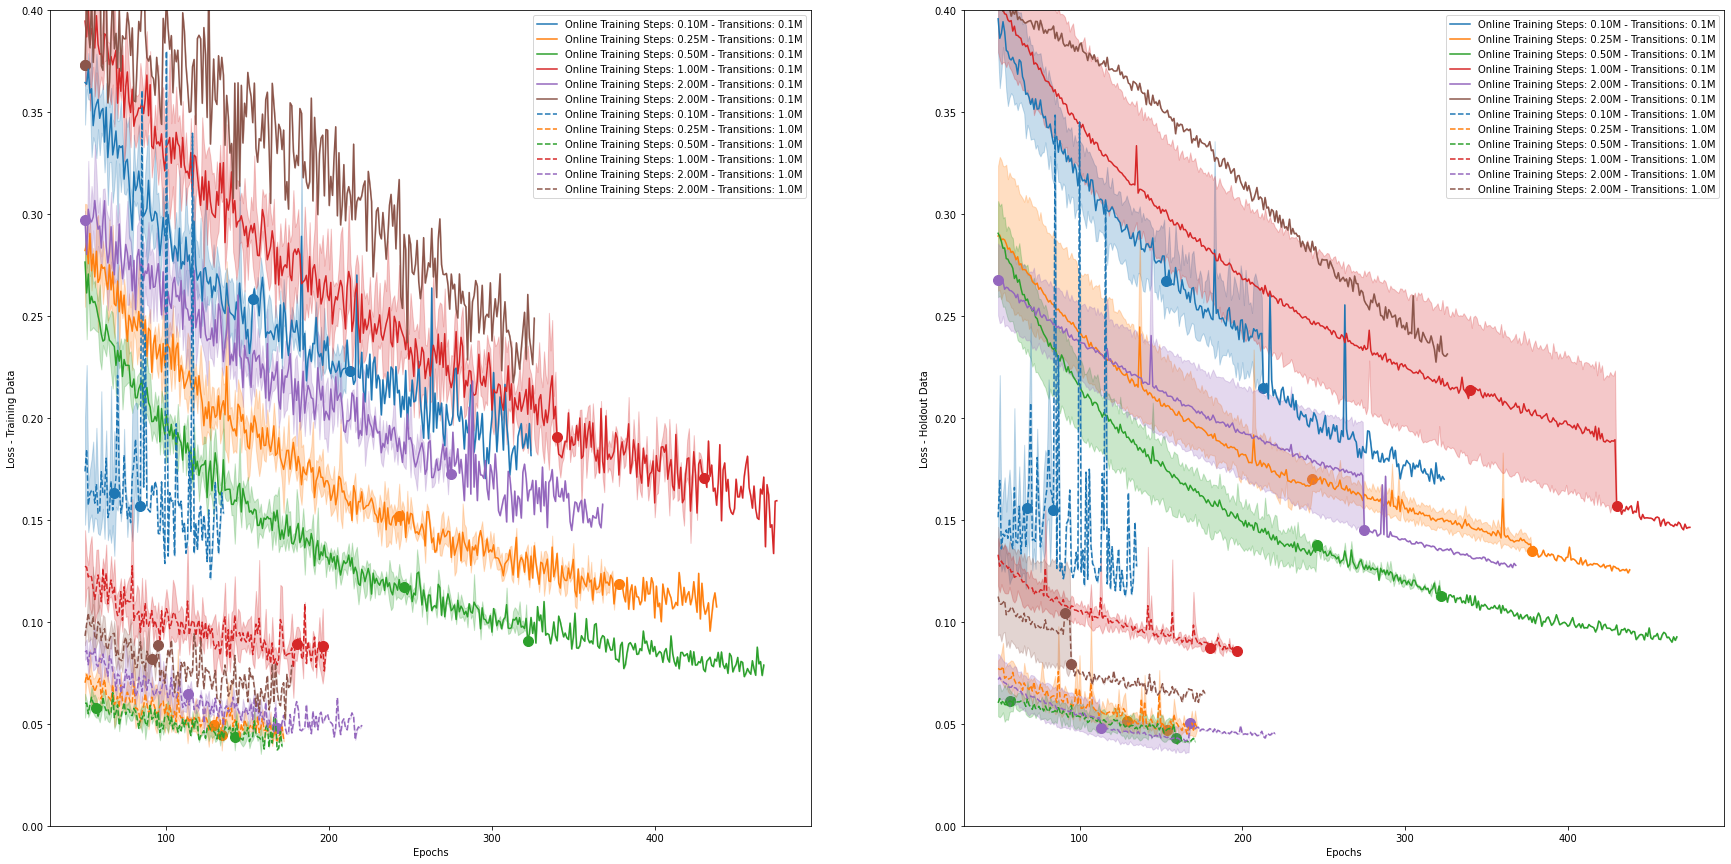

In [6]:
fig, ax = plt.subplots(1, 2, figsize=(30,15))

starting_epoch = 100
for i, metric in enumerate(['model_loss_history', 'model_holdout_loss_history']):
    for j, exp_set_lables in enumerate([
        [
            ((MP674, MP675, MP676), 'Online Training Steps: 0.10M - Transitions: 0.1M'),
            ((MP551, MP552, MP553), 'Online Training Steps: 0.25M - Transitions: 0.1M'),
            ((MP554, MP555, MP556), 'Online Training Steps: 0.50M - Transitions: 0.1M'),
            ((MP557, MP558, MP559), 'Online Training Steps: 1.00M - Transitions: 0.1M'),
            ((MP560, MP561, MP562), 'Online Training Steps: 2.00M - Transitions: 0.1M'),
            ((MP563, MP564, MP565), 'Online Training Steps: 2.00M - Transitions: 0.1M'),
        ],
        [
            ((MP683, MP684, MP685), 'Online Training Steps: 0.10M - Transitions: 1.0M'),
            ((MP581, MP582, MP583), 'Online Training Steps: 0.25M - Transitions: 1.0M'),
            ((MP584, MP585, MP586), 'Online Training Steps: 0.50M - Transitions: 1.0M'),
            ((MP587, MP588, MP589), 'Online Training Steps: 1.00M - Transitions: 1.0M'),
            ((MP590, MP591, MP592), 'Online Training Steps: 2.00M - Transitions: 1.0M'),
            ((MP593, MP594, MP595), 'Online Training Steps: 2.00M - Transitions: 1.0M'),
        ],
    ]):
        for k, (exp_set, legend_label) in enumerate(exp_set_lables):
            comb_arr= np.vstack(list(zip_longest(*[
                getattr(exp.dynamics, metric).mean(axis=1).values for exp in exp_set
                ],
                fillvalue=np.NaN
            )))[starting_epoch:]
            mean_arr = np.nanmean(comb_arr, axis=-1)
            min_arr = np.nanmin(comb_arr, axis=-1)
            max_arr = np.nanmax(comb_arr, axis=-1)
            x_vals = np.arange(len(mean_arr)) + 50

            ax[i].plot(x_vals, mean_arr, c=cols[k], ls=lss[j], label=legend_label)
            ax[i].fill_between(x_vals, min_arr, max_arr, color=cols[k], alpha=0.25)

            terminal_points = np.sort(comb_arr.argmin(axis=0))[:-1]
            ax[i].scatter(x_vals[terminal_points], mean_arr[terminal_points], color=cols[k], s=100)

    ax[i].set_xlabel('Epochs')
    ax[i].set_ylim(0,0.4)
    ax[i].legend()

ax[0].set_ylabel('Loss - Training Data')
ax[1].set_ylabel('Loss - Holdout Data')

pass

In [7]:
MP080 = get_results("MP080")

In [8]:
######
# MOPO
######
MP677 = get_results("MP677") # 0.1M Records
MP678 = get_results("MP678") 
MP679 = get_results("MP679") 
MP566 = get_results("MP566") # 0.25M Records
MP567 = get_results("MP567") 
MP568 = get_results("MP568") 
MP569 = get_results("MP569") # 0.5M Records
MP570 = get_results("MP570") 
MP571 = get_results("MP571") 
MP572 = get_results("MP572") # 1M Records
MP573 = get_results("MP573") 
MP574 = get_results("MP574") 
MP575 = get_results("MP575") # 2M Records
MP576 = get_results("MP576") 
MP577 = get_results("MP577") 
MP578 = get_results("MP578") # 3M Records
MP579 = get_results("MP579") 
MP580 = get_results("MP580") 

In [9]:
######
# MBPO
######
MP680 = get_results("MP680") # 0.1M Records
MP681 = get_results("MP681") 
MP682 = get_results("MP682") 
MP641 = get_results("MP641") # 0.25M Records
MP642 = get_results("MP642")
MP643 = get_results("MP643")
MP644 = get_results("MP644") # 0.5M Records
MP645 = get_results("MP645")
MP646 = get_results("MP646")
MP647 = get_results("MP647") # 1M Records
MP648 = get_results("MP648")
MP649 = get_results("MP649")
MP650 = get_results("MP650") # 2M Records
MP651 = get_results("MP651")
MP652 = get_results("MP652")
MP653 = get_results("MP653") # 3M Records
MP654 = get_results("MP654")
MP655 = get_results("MP655")

## MOPO

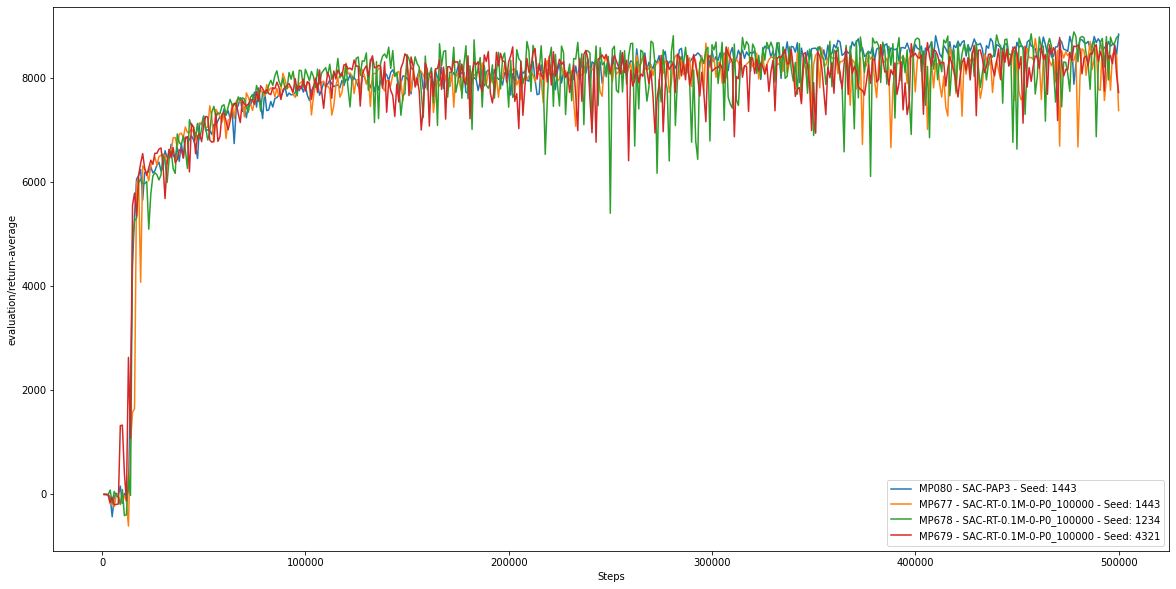

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(20,10))

feature = 'evaluation/return-average'
for exp in [
    MP080,
    MP677,
    MP678,
    MP679,
]:
    ax.plot(
        exp.sac.result['timesteps_total'], exp.sac.result[feature], label=f'{exp.name} - {exp.dataset} - Seed: {exp.seed}'
    )
ax.set_xlabel('Steps')
ax.set_ylabel(feature)
ax.legend()
pass

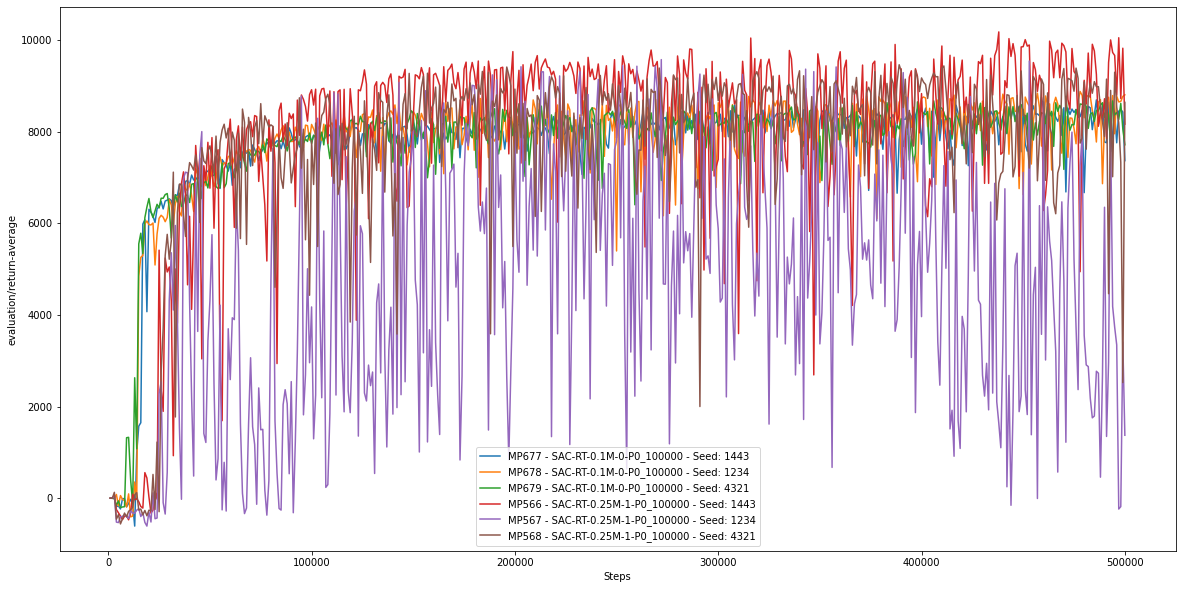

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(20,10))

feature = 'evaluation/return-average'
for exp in [
    MP677,
    MP678,
    MP679,
    MP566,
    MP567,
    MP568,
    # MP569,
    # MP570,
    # MP571,
    # MP572,
    # MP573,
    # MP574,
    # MP575,
    # MP576,
    # MP577,
    # MP578,
    # MP579,
    # MP580,
]:
    ax.plot(
        exp.sac.result['timesteps_total'], exp.sac.result[feature], label=f'{exp.name} - {exp.dataset} - Seed: {exp.seed}'
    )
ax.set_xlabel('Steps')
ax.set_ylabel(feature)
ax.legend()
pass

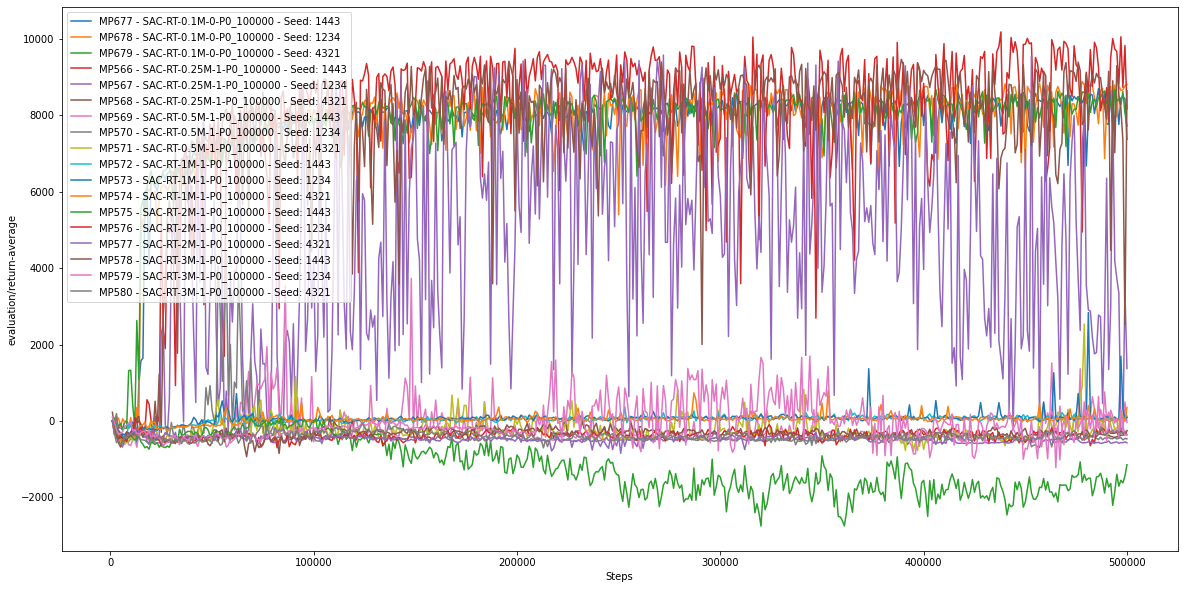

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(20,10))

feature = 'evaluation/return-average'
for exp in [
    MP677,
    MP678,
    MP679,
    MP566,
    MP567,
    MP568,
    MP569,
    MP570,
    MP571,
    MP572,
    MP573,
    MP574,
    MP575,
    MP576,
    MP577,
    MP578,
    MP579,
    MP580,
]:
    ax.plot(
        exp.sac.result['timesteps_total'], exp.sac.result[feature], label=f'{exp.name} - {exp.dataset} - Seed: {exp.seed}'
    )
ax.set_xlabel('Steps')
ax.set_ylabel(feature)
ax.legend()
pass

{'Steps: 0.1M': {'mean': 7961, 'std': 612, 'count': 3},
 'Steps: 0.25M': {'mean': 6058, 'std': 3319, 'count': 3},
 'Steps: 0.5M': {'mean': -124, 'std': 252, 'count': 3},
 'Steps: 1M': {'mean': 181, 'std': 119, 'count': 3},
 'Steps: 2M': {'mean': -657, 'std': 368, 'count': 3},
 'Steps: 3M': {'mean': -323, 'std': 49, 'count': 3}}

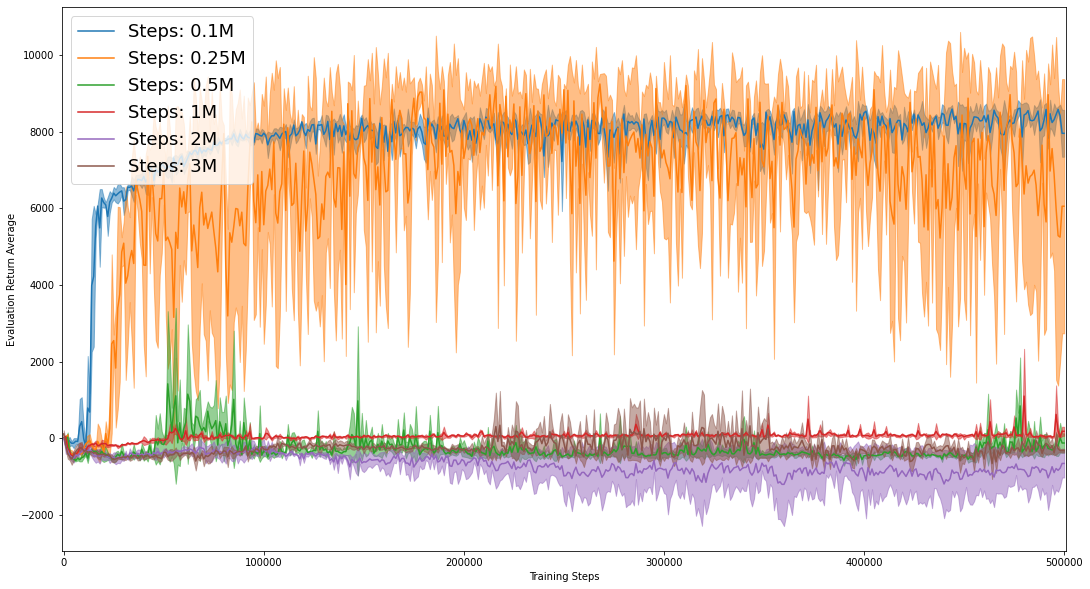

In [13]:
plot_grouped_evaluation_returns([
    ((MP677, MP678, MP679), 'Steps: 0.1M'),
    ((MP566, MP567, MP568), 'Steps: 0.25M'),
    ((MP569, MP570, MP571), 'Steps: 0.5M'),
    ((MP572, MP573, MP574), 'Steps: 1M'),
    ((MP575, MP576, MP577), 'Steps: 2M'),
    ((MP578, MP579, MP580), 'Steps: 3M'),
], save_path='ch4/softlearning_100k_records.png')

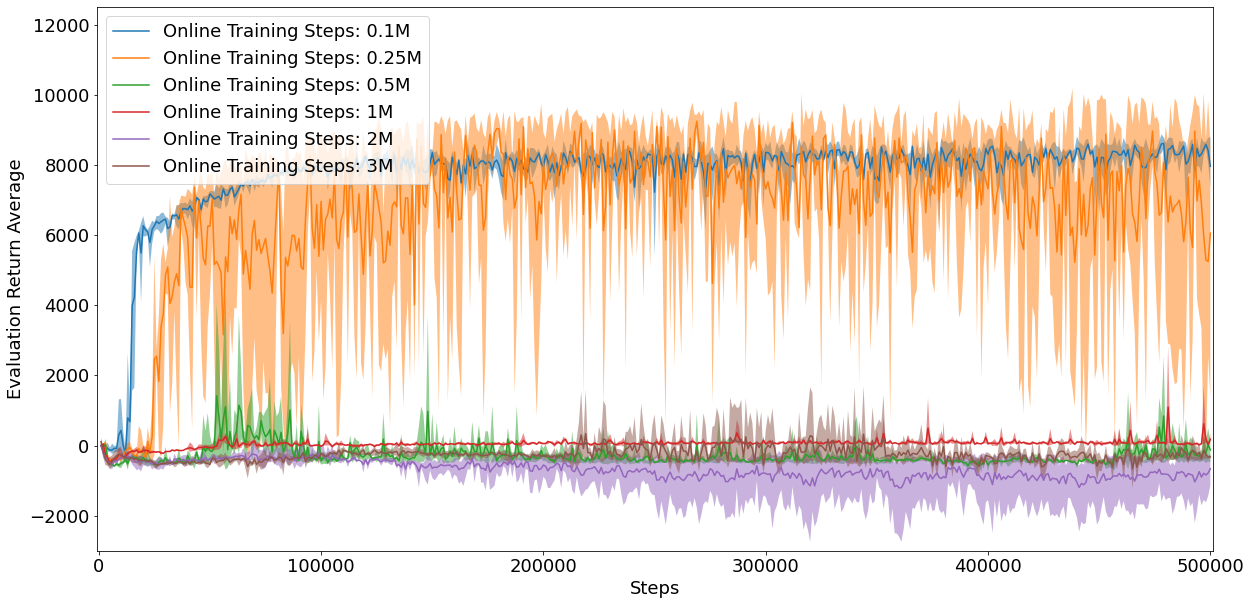

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(20,10))

terminal_stats = {}
feature = 'evaluation/return-average'
for exp_set, steps in [
    ((MP677, MP678, MP679), '0.1'),
    ((MP566, MP567, MP568), '0.25'),
    ((MP569, MP570, MP571), '0.5'),
    ((MP572, MP573, MP574), '1'),
    ((MP575, MP576, MP577), '2'),
    ((MP578, MP579, MP580), '3'),
]:
    stacked_data = np.vstack([i.sac.result[feature] for i in exp_set])
    mean_vals = stacked_data.mean(axis=0)
    std_vals = stacked_data.std(axis=0)
    min_vals = stacked_data.min(axis=0)
    max_vals = stacked_data.max(axis=0)
    ax.plot(exp.sac.result['timesteps_total'], mean_vals, label=f'Online Training Steps: {steps}M')
    ax.fill_between(exp.sac.result['timesteps_total'], min_vals, max_vals, alpha=0.5)
    terminal_stats[exp_set[0].dataset] = {'mean': mean_vals[-1], 'std': std_vals[-1], 'text ': f'{mean_vals[-1]:.0f}±{std_vals[-1]:.0f}'}
ax.set_xlabel('Steps')
ax.set_ylabel('Evaluation Return Average')
ax.set_xlim(-1000,501000)
ax.set_ylim(-3000,12500)
ax.legend(loc='upper left')
pass

In [15]:
terminal_stats

{'SAC-RT-0.1M-0-P0_100000': {'mean': 7960.698893229167,
  'std': 611.992830492305,
  'text ': '7961±612'},
 'SAC-RT-0.25M-1-P0_100000': {'mean': 6057.777587890625,
  'std': 3318.785537269764,
  'text ': '6058±3319'},
 'SAC-RT-0.5M-1-P0_100000': {'mean': -123.98271052042644,
  'std': 252.49693000561064,
  'text ': '-124±252'},
 'SAC-RT-1M-1-P0_100000': {'mean': 181.39727274576822,
  'std': 118.97982982964245,
  'text ': '181±119'},
 'SAC-RT-2M-1-P0_100000': {'mean': -657.1679077148438,
  'std': 367.91852273135913,
  'text ': '-657±368'},
 'SAC-RT-3M-1-P0_100000': {'mean': -322.6571909586589,
  'std': 49.30691874382512,
  'text ': '-323±49'}}

## MBPO

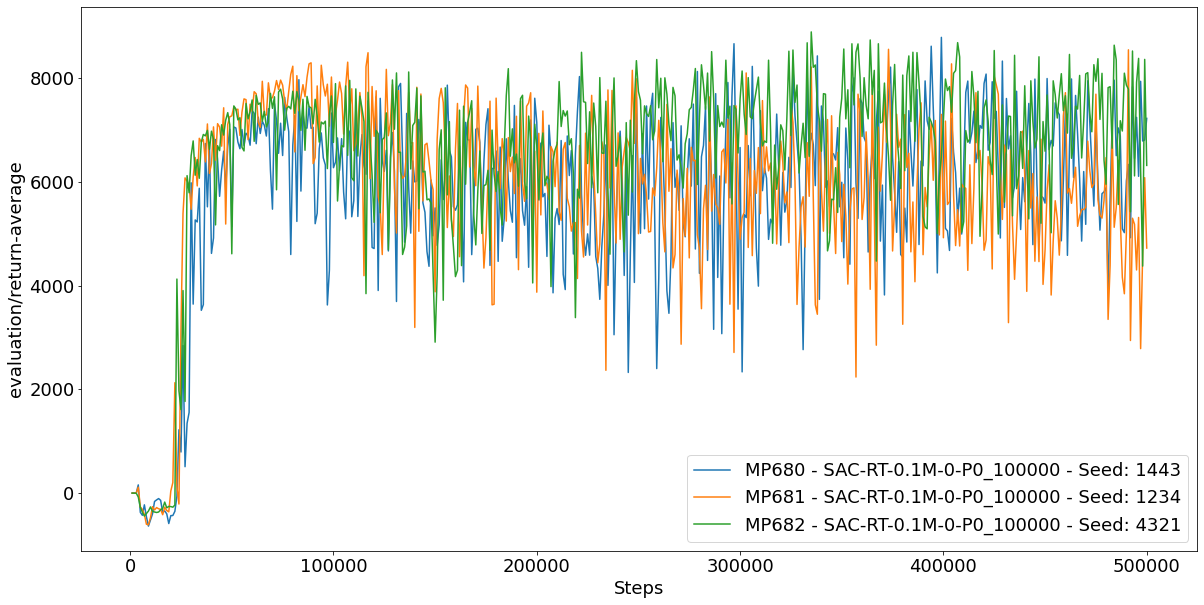

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(20,10))

feature = 'evaluation/return-average'
for exp in [
    MP680,
    MP681,
    MP682,
]:
    ax.plot(
        exp.sac.result['timesteps_total'], exp.sac.result[feature], label=f'{exp.name} - {exp.dataset} - Seed: {exp.seed}'
    )
ax.set_xlabel('Steps')
ax.set_ylabel(feature)
ax.legend()
pass

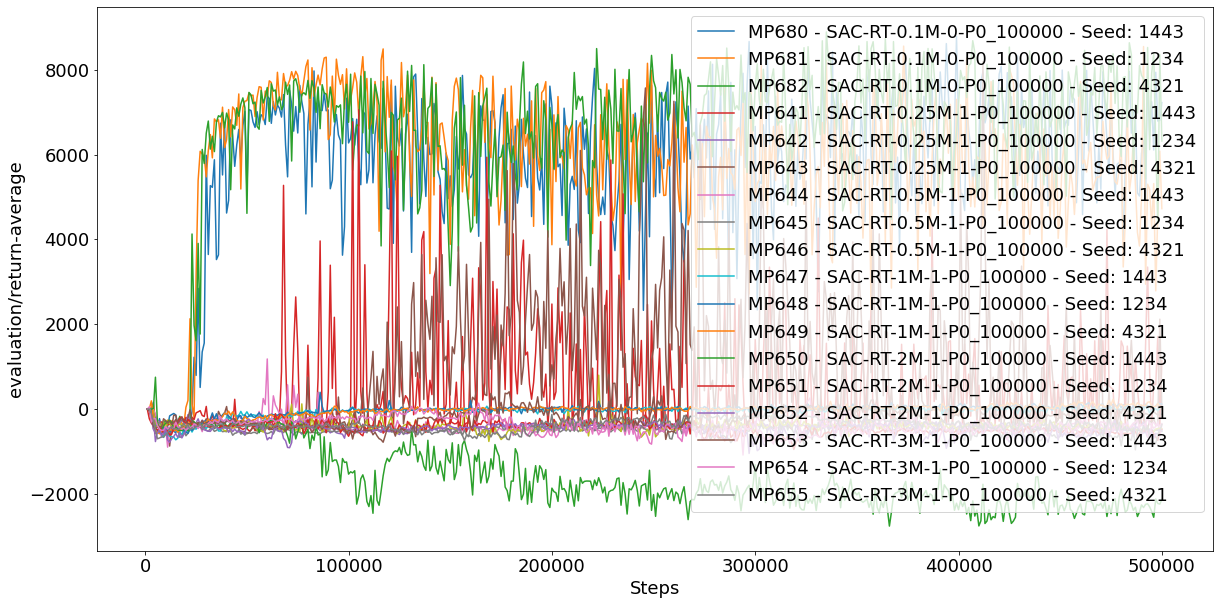

In [17]:
fig, ax = plt.subplots(1, 1, figsize=(20,10))

feature = 'evaluation/return-average'
for exp in [
    MP680,
    MP681,
    MP682,
    MP641,
    MP642,
    MP643,
    MP644,
    MP645,
    MP646,
    MP647,
    MP648,
    MP649,
    MP650,
    MP651,
    MP652,
    MP653,
    MP654,
    MP655,
]:
    ax.plot(
        exp.sac.result['timesteps_total'], exp.sac.result[feature], label=f'{exp.name} - {exp.dataset} - Seed: {exp.seed}'
    )
ax.set_xlabel('Steps')
ax.set_ylabel(feature)
ax.legend()
pass

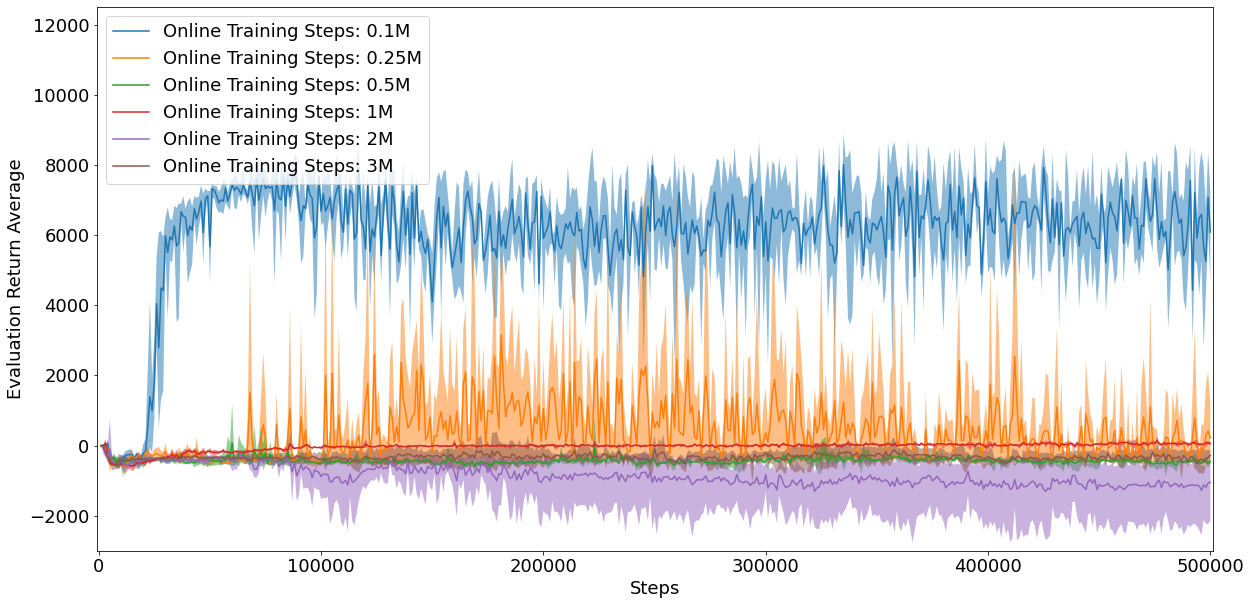

In [20]:
fig, ax = plt.subplots(1, 1, figsize=(20,10))

terminal_stats = {}
feature = 'evaluation/return-average'
for exp_set, steps in [
    ((MP680, MP681, MP682), '0.1'),
    ((MP641, MP642, MP643), '0.25'),
    ((MP644, MP645, MP646), '0.5'),
    ((MP647, MP648, MP649), '1'),
    ((MP650, MP651, MP652), '2'),
    ((MP653, MP654, MP655), '3'),
]:
    stacked_data = np.vstack([i.sac.result[feature] for i in exp_set])
    mean_vals = stacked_data.mean(axis=0)
    std_vals = stacked_data.std(axis=0)
    min_vals = stacked_data.min(axis=0)
    max_vals = stacked_data.max(axis=0)
    ax.plot(exp.sac.result['timesteps_total'], mean_vals, label=f'Online Training Steps: {steps}M')
    ax.fill_between(exp.sac.result['timesteps_total'], min_vals, max_vals, alpha=0.5)
    terminal_stats[exp_set[0].dataset] = {'mean': mean_vals[-1], 'std': std_vals[-1], 'text ': f'{mean_vals[-1]:.0f} ± {std_vals[-1]:.0f}'}
ax.set_xlabel('Steps')
ax.set_ylabel('Evaluation Return Average')
ax.set_xlim(-1000,501000)
ax.set_ylim(-3000,12500)
ax.legend(loc='upper left')
pass

In [21]:
terminal_stats

{'SAC-RT-0.1M-0-P0_100000': {'mean': 6087.984700520833,
  'std': 1033.3121379305928,
  'text ': '6088 ± 1033'},
 'SAC-RT-0.25M-1-P0_100000': {'mean': 217.85249010721842,
  'std': 678.2001762935042,
  'text ': '218 ± 678'},
 'SAC-RT-0.5M-1-P0_100000': {'mean': -456.5682881673177,
  'std': 64.52972524252624,
  'text ': '-457 ± 65'},
 'SAC-RT-1M-1-P0_100000': {'mean': 57.298736572265625,
  'std': 38.81356369437665,
  'text ': '57 ± 39'},
 'SAC-RT-2M-1-P0_100000': {'mean': -1043.5137939453125,
  'std': 768.5333789412664,
  'text ': '-1044 ± 769'},
 'SAC-RT-3M-1-P0_100000': {'mean': -278.82208760579425,
  'std': 108.58958180869966,
  'text ': '-279 ± 109'}}